## Predict Crime Rate in Chicago using Facebook Prophet

### Theoretical Concepts

**DATASET DESCRIPTION:**

This dataset contains a sumamry of reported crimes in the city of Chicago from 2001 to 2017

Contains 22 columns i.e. 22 features that can be used for analysis. But we need to filter out according to our use case.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

In [4]:
#Uncomment below lines to Load csv from Google Drive.
'''
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/CSV Datasets/'

filename_1 = root_path + "Chicago_Crimes_2005_to_2007.csv"
filename_2 = root_path + "Chicago_Crimes_2008_to_2011.csv"
filename_3 = root_path + "Chicago_Crimes_2012_to_2017.csv"
'''

#Loading from local runtime
filename_1 = "../Datasets/Chicago_Crimes_2005_to_2007.csv"
filename_2 = "../Datasets/Chicago_Crimes_2008_to_2011.csv"
filename_3 = "../Datasets/Chicago_Crimes_2012_to_2017.csv"


In [5]:
chicago_df_1 = pd.read_csv(filename_1, on_bad_lines='skip')
chicago_df_2 = pd.read_csv(filename_2, on_bad_lines='skip')
chicago_df_3 = pd.read_csv(filename_3, on_bad_lines='skip')

In [6]:
chicago_df_1.shape

(1872343, 23)

In [7]:
chicago_df_2.shape

(2688710, 23)

In [8]:
chicago_df_3.shape

(1456714, 23)

In [18]:
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

In [10]:
chicago_df.shape

(6017767, 23)

In [11]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [12]:
chicago_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [19]:
chicago_df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
chicago_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

<AxesSubplot:>

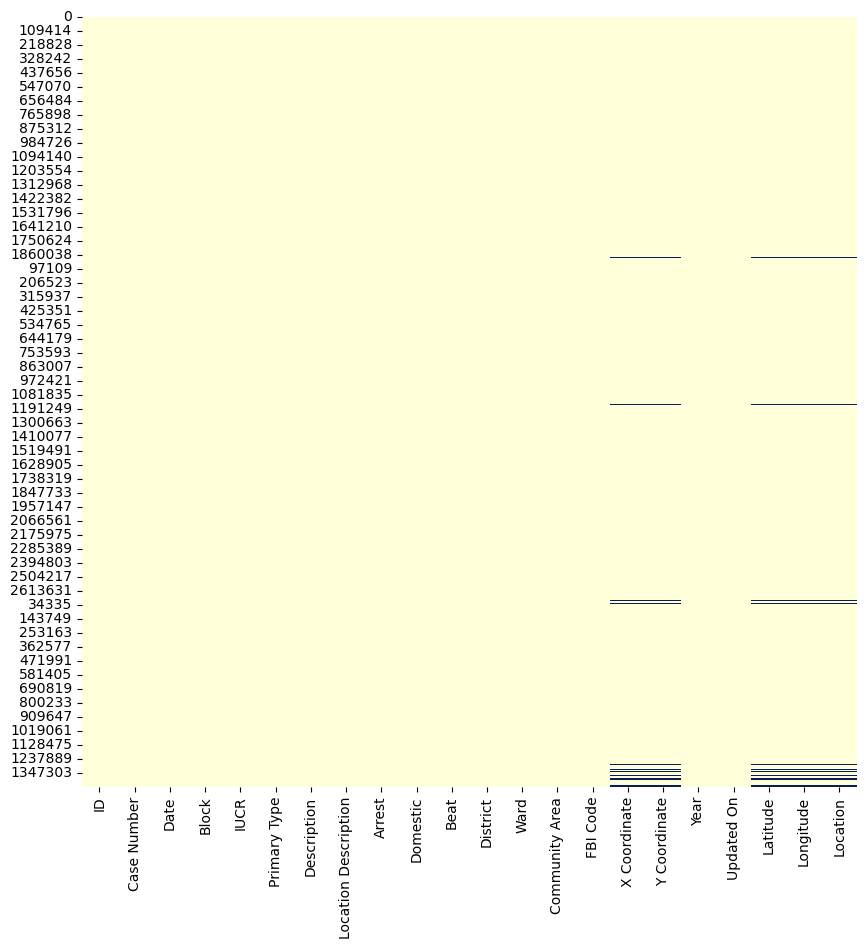

In [15]:
#Visualizing the missing data
plt.figure(figsize = (10,10))
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='YlGnBu')

In [20]:
chicago_df.drop(["ID", "Case Number", "IUCR", "X Coordinate", "Y Coordinate", "Updated On", "FBI Code", "Beat", "Ward", \
                "Community Area", "Location", "District", "Latitude", "Longitude", "Year"], axis=1, inplace=True)

In [21]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [24]:
chicago_df.Date =pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [43]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [44]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [45]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [46]:
#Get top 15 samples for crime type
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [47]:
order_type = chicago_df['Primary Type'].value_counts().iloc[:15].index
order_type

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

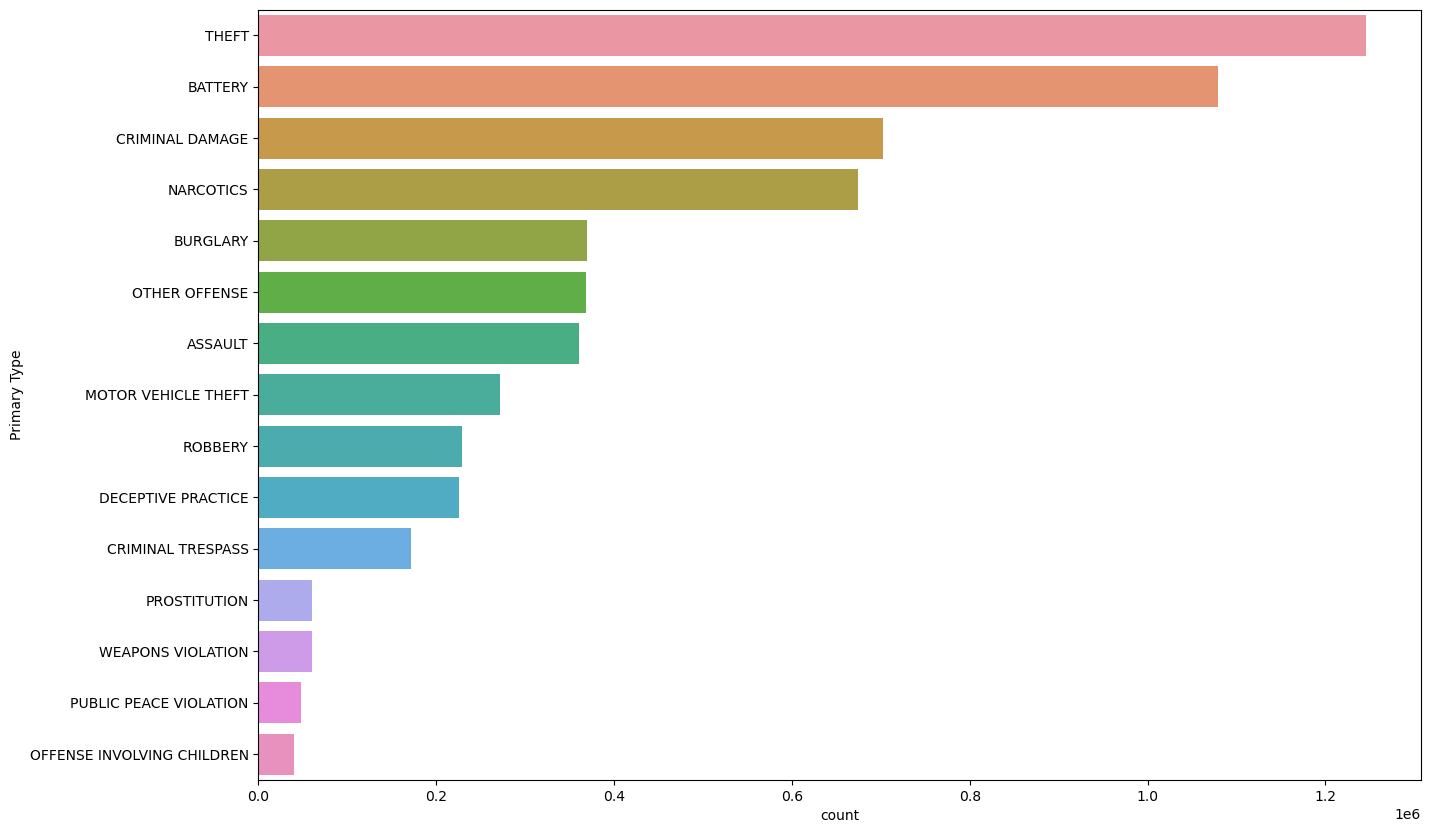

In [48]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_type)

In [49]:
order_loc = chicago_df['Location Description'].value_counts().iloc[:50].index
order_loc

Index(['STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'VEHICLE NON-COMMERCIAL', 'RESIDENCE PORCH/HALLWAY',
       'SMALL RETAIL STORE', 'RESTAURANT', 'DEPARTMENT STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'GROCERY FOOD STORE', 'GAS STATION',
       'PARK PROPERTY', 'COMMERCIAL / BUSINESS OFFICE',
       'CHA PARKING LOT/GROUNDS', 'BAR OR TAVERN', 'CTA PLATFORM',
       'SCHOOL, PUBLIC, GROUNDS', 'DRUG STORE', 'BANK', 'HOTEL/MOTEL',
       'CHA APARTMENT', 'VACANT LOT/LAND', 'CTA TRAIN', 'CTA BUS',
       'DRIVEWAY - RESIDENTIAL', 'TAVERN/LIQUOR STORE',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'HOSPITAL BUILDING/GROUNDS',
       'POLICE FACILITY/VEH PARKING LOT', 'CONVENIENCE STORE',
       'AIRPORT/AIRCRAFT', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP',
       'CONSTRUCTION SITE', 'GOVERNMENT BUILDING/PROPERTY',
       'ABANDONED BUILDING', 'CTA GARAGE / OTHER PROPERTY',
    

<AxesSubplot:xlabel='count', ylabel='Location Description'>

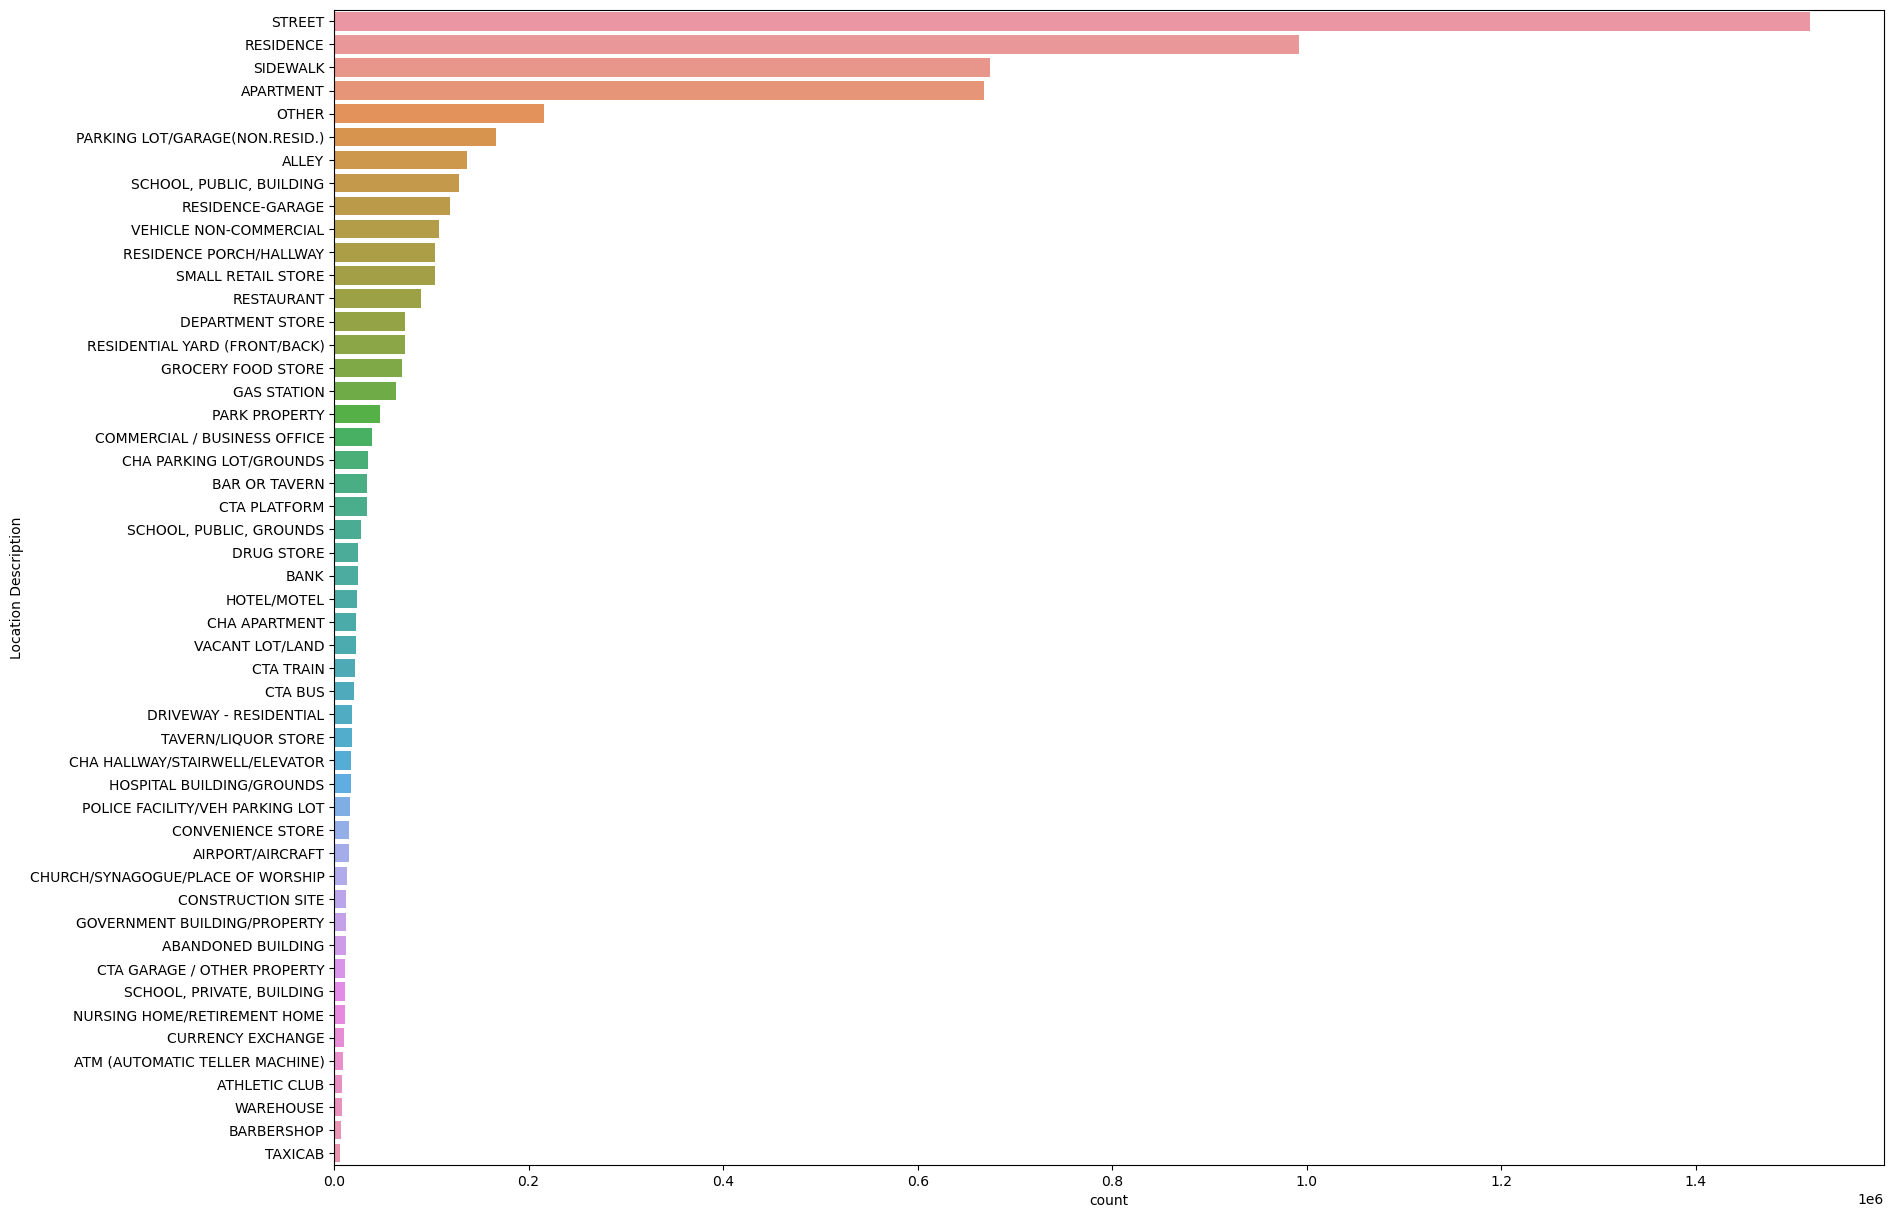

In [42]:
plt.figure(figsize = (20,15))
sns.countplot(y = 'Location Description', data = chicago_df, order = order_loc)

In [50]:
#Resample the data
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'No. of Crimes')

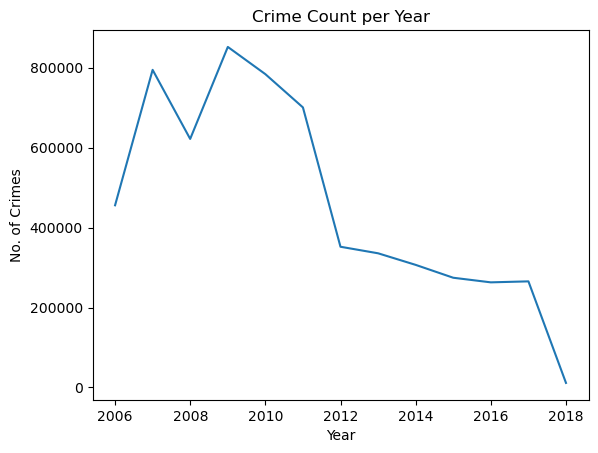

In [51]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count per Year')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')

Text(0, 0.5, 'No. of Crimes')

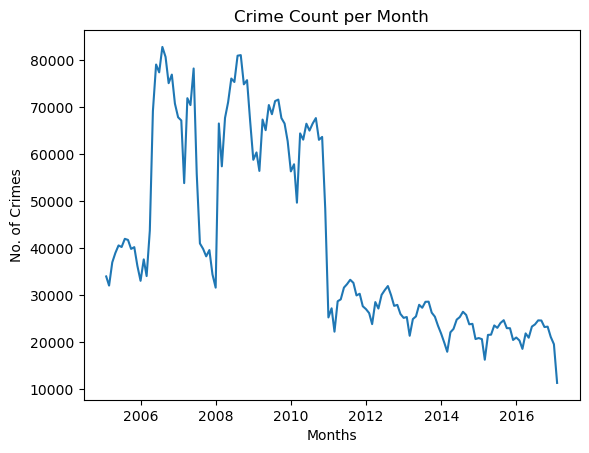

In [52]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count per Month')
plt.xlabel('Months')
plt.ylabel('No. of Crimes')

Text(0, 0.5, 'No. of Crimes')

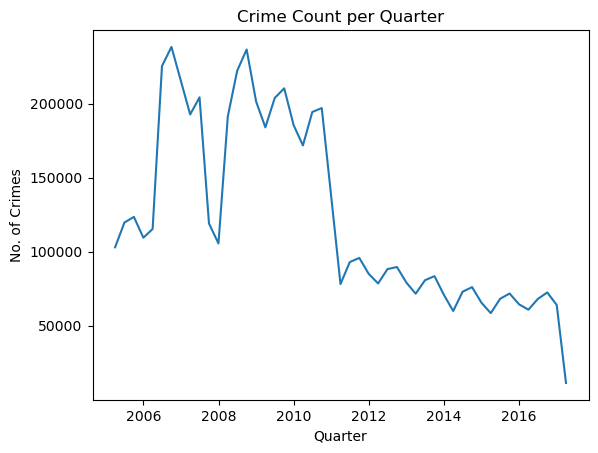

In [54]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count per Quarter')
plt.xlabel('Quarter')
plt.ylabel('No. of Crimes')

In [55]:
#Preparing data
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [56]:
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [57]:
#In order to apply prophet the date columns needs to renamed as 'ds'
#and the other column as 'y'
chicago_prophet_df = chicago_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [58]:
chicago_prophet_df

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [59]:
m = Prophet()
m.fit(chicago_prophet_df)

23:57:37 - cmdstanpy - INFO - Chain [1] start processing
23:57:37 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
#we need data for a period of 365 days
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [61]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60455.329500,39226.061054,73479.308781,60455.329500,60455.329500,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,0.0,0.0,0.0,55672.402364
1,2005-02-28,60324.544550,32728.368277,67430.000719,60324.544550,60324.544550,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,0.0,0.0,0.0,50861.061122
2,2005-03-31,60179.746928,42566.645752,75214.114893,60179.746928,60179.746928,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,0.0,0.0,0.0,58932.982288
3,2005-04-30,60039.620196,43300.187461,78728.408507,60039.620196,60039.620196,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,0.0,0.0,0.0,61151.049859
4,2005-05-31,59894.822573,49055.594240,83600.323294,59894.822573,59894.822573,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,0.0,0.0,0.0,65281.382508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,9656.534283,-11207.512646,22043.087270,9503.334984,9814.003379,-4094.868857,-4094.868857,-4094.868857,-4094.868857,-4094.868857,-4094.868857,0.0,0.0,0.0,5561.665426
506,2018-01-28,9643.198507,-10726.332123,21472.431147,9489.511701,9800.957226,-4237.127815,-4237.127815,-4237.127815,-4237.127815,-4237.127815,-4237.127815,0.0,0.0,0.0,5406.070692
507,2018-01-29,9629.862730,-11432.650607,22546.964443,9475.688419,9788.111241,-4391.658528,-4391.658528,-4391.658528,-4391.658528,-4391.658528,-4391.658528,0.0,0.0,0.0,5238.204202
508,2018-01-30,9616.526953,-11158.439768,21461.389584,9461.865136,9775.475518,-4558.195286,-4558.195286,-4558.195286,-4558.195286,-4558.195286,-4558.195286,0.0,0.0,0.0,5058.331667


In [62]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

The columns in the output of Prophet prediction in Python are:

* `ds`: The date and time of the forecast.
* `trend`: The forecasted trend value.
* `yhat`: The forecasted value, which is the sum of the trend, seasonal components, and holidays.
* `yhat_lower`: The lower bound of the forecast uncertainty interval.
* `yhat_upper`: The upper bound of the forecast uncertainty interval.
* `trend_lower`: The lower bound of the trend uncertainty interval.
* `trend_upper`: The upper bound of the trend uncertainty interval.
* `additive_terms`: The sum of the additive seasonal components.
* `additive_terms_lower`: The lower bound of the additive seasonal components uncertainty interval.
* `additive_terms_upper`: The upper bound of the additive seasonal components uncertainty interval.
* `yearly`: The yearly seasonal component.
* `yearly_lower`: The lower bound of the yearly seasonal component uncertainty interval.
* `yearly_upper`: The upper bound of the yearly seasonal component uncertainty interval.
* `multiplicative_terms`: The sum of the multiplicative seasonal components.
* `multiplicative_terms_lower`: The lower bound of the multiplicative seasonal components uncertainty interval.
* `multiplicative_terms_upper`: The upper bound of the multiplicative seasonal components uncertainty interval.

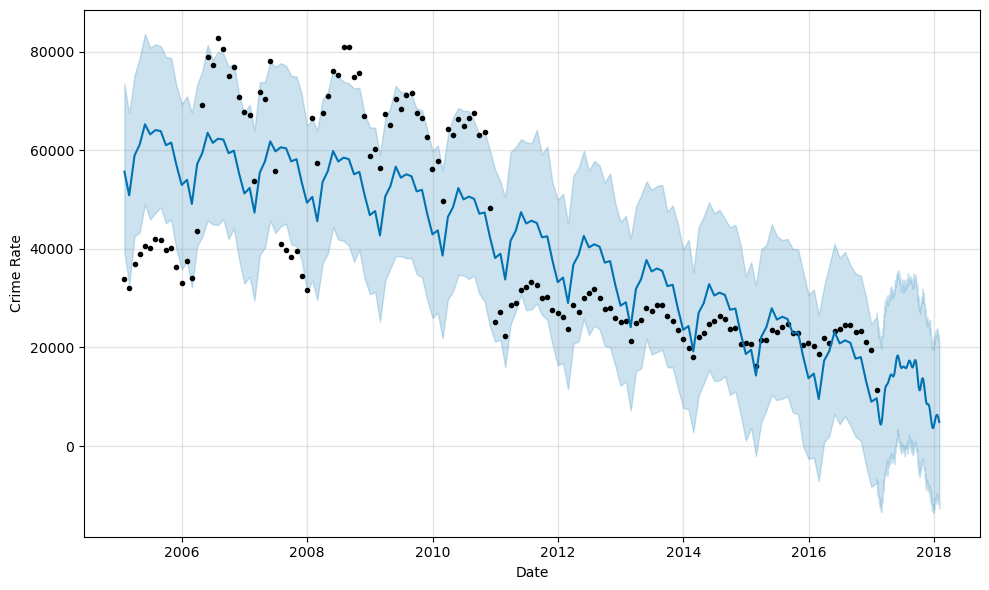

In [63]:
#Visualize predictions for the future
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

* In the above graph, the black dots are the data that we  have provided and that is upto year 2017. 
* Beyond that i.e. from 2017 to 2018 we can see the graph being plotted. These are the predicted values of the crime rate by the prophet model.
* We also, have the upper and lower bounds being depicted in the graph fro ther crime rate values.

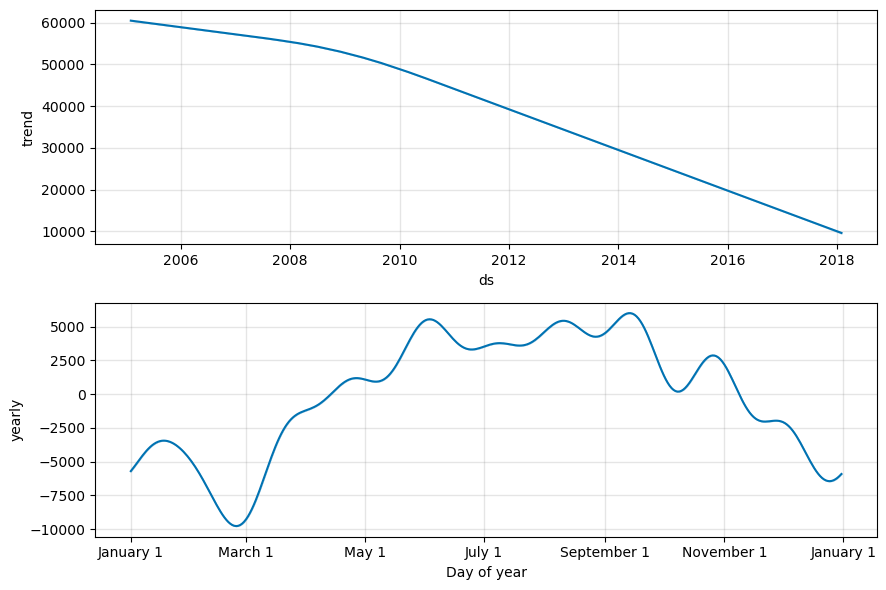

In [64]:
#Let us see what happens in a specific year
#Also known as seasonality of the year. Which means the trend it can show based on the data

figure = m.plot_components(forecast)

In [65]:
#we need data for a period of 5 years
future_five = m.make_future_dataframe(periods = (365 * 5))
forecast_five = m.predict(future_five)
forecast_five

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60455.329500,38973.766527,72393.139351,60455.329500,60455.329500,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,0.0,0.0,0.0,55672.402364
1,2005-02-28,60324.544550,34216.802066,68557.909956,60324.544550,60324.544550,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,0.0,0.0,0.0,50861.061122
2,2005-03-31,60179.746928,42387.316581,75709.552739,60179.746928,60179.746928,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,0.0,0.0,0.0,58932.982288
3,2005-04-30,60039.620196,43897.814077,77120.674196,60039.620196,60039.620196,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,0.0,0.0,0.0,61151.049859
4,2005-05-31,59894.822573,47180.253738,80458.971764,59894.822573,59894.822573,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,0.0,0.0,0.0,65281.382508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,2022-01-26,-9813.699645,-30455.023732,3984.879969,-11676.404944,-7917.854875,-3965.223186,-3965.223186,-3965.223186,-3965.223186,-3965.223186,-3965.223186,0.0,0.0,0.0,-13778.922830
1966,2022-01-27,-9827.035421,-29860.658553,3880.368847,-11691.138128,-7930.074829,-4094.868857,-4094.868857,-4094.868857,-4094.868857,-4094.868857,-4094.868857,0.0,0.0,0.0,-13921.904279
1967,2022-01-28,-9840.371198,-31187.058184,2603.394584,-11705.871312,-7942.294783,-4237.127815,-4237.127815,-4237.127815,-4237.127815,-4237.127815,-4237.127815,0.0,0.0,0.0,-14077.499013
1968,2022-01-29,-9853.706975,-30427.097234,2665.679492,-11720.604497,-7954.406931,-4391.658528,-4391.658528,-4391.658528,-4391.658528,-4391.658528,-4391.658528,0.0,0.0,0.0,-14245.365503


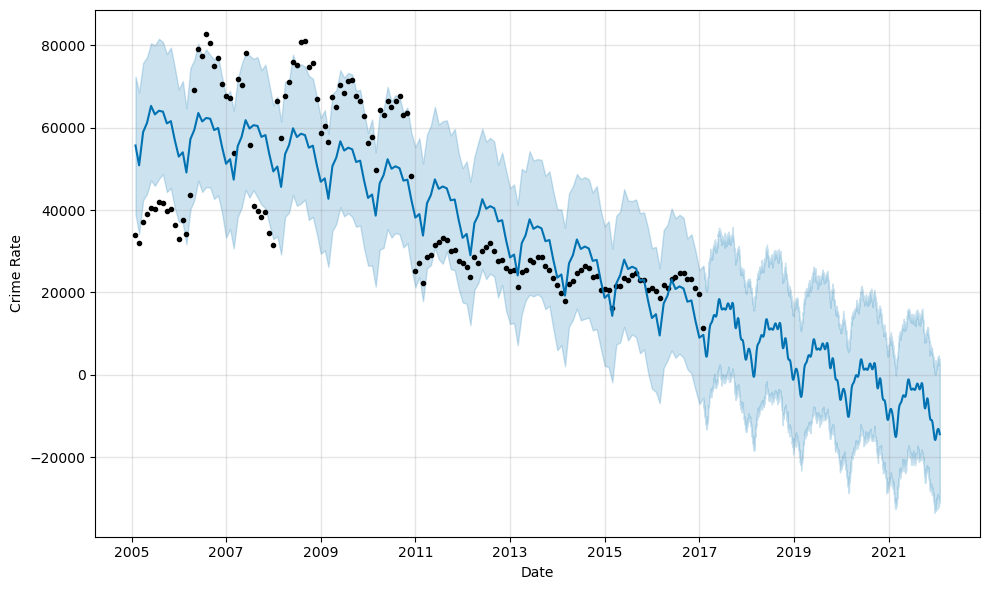

In [66]:
#Visualize predictions for the future
figure = m.plot(forecast_five, xlabel = 'Date', ylabel = 'Crime Rate')

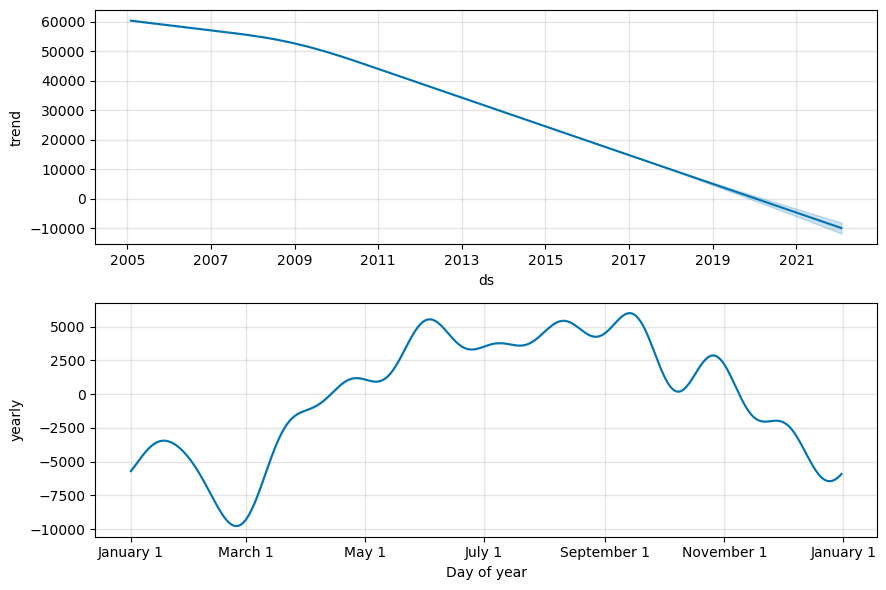

In [67]:
figure = m.plot_components(forecast_five)